In [18]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

# Data Preprocessing

In [19]:
raw_data = pd.read_csv("train.csv")
data = raw_data[raw_data.columns[~raw_data.columns.isin(["critical_temp"])]]
labels = raw_data["critical_temp"]

# print(data.describe())

counted: pd.Series = data.count()
# No sparse data :)

data = data.to_numpy()

correlations = {raw_data.columns[x]:np.corrcoef(data[:,x], labels)[0,1] for x in range(data.shape[1])}
featuresToKeep = [feature for feature, corr in correlations.items() if abs(corr) >= 0.35]

#print(correlations)
print(featuresToKeep)
print(len(featuresToKeep))

data = raw_data[featuresToKeep].to_numpy()

featuresToRemove = set()

for x in range(data.shape[1]):
    for y in range(data.shape[1]):
        if x != y and abs(np.corrcoef(data[:,x], data[:,y])[0,1]) >= 0.80:
            #print(featuresToKeep[x], featuresToKeep[y])
            featuresToRemove.add(featuresToKeep[x] if abs(correlations[featuresToKeep[x]]) < abs(correlations[featuresToKeep[y]]) else featuresToKeep[y])

print(featuresToRemove)
print(len(featuresToRemove))

featuresToKeep = list(set(featuresToKeep).difference(featuresToRemove))
numFeaturesToKeep = len(featuresToKeep)
print([feature + ": " + str(correlations[feature]) for feature in featuresToKeep])
print(numFeaturesToKeep)

data = raw_data[featuresToKeep]

['number_of_elements', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'wtd_mean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'std_fie', 'wtd_std_fie', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'mean_FusionHeat', 'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat', 'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'mean_ThermalConductivity', 'wtd_mean_ThermalConductivity', 'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity', 'range_ThermalConductivity', 'wtd_range_ThermalConductivity', 'std_ThermalConductivity', 'wtd_std_ThermalConductivity', 'mean_Valence', 'wtd_mean_Valence', 'gmean_Valence', '

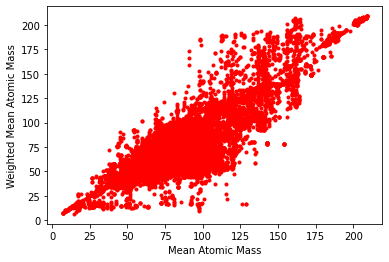

wtd_std_ThermalConductivity, wtd_range_Valence, gmean_ThermalConductivity, gmean_ElectronAffinity, range_atomic_mass, wtd_range_ThermalConductivity, range_atomic_radius, wtd_gmean_FusionHeat, wtd_mean_Valence, mean_ThermalConductivity, wtd_entropy_atomic_mass


In [20]:
plt.scatter(raw_data["mean_atomic_mass"], raw_data["wtd_mean_atomic_mass"], marker=".", c="r")
plt.xlabel("Mean Atomic Mass")
plt.ylabel("Weighted Mean Atomic Mass")
plt.show()
print(", ".join(featuresToKeep))

In [21]:
atomicMass = pd.DataFrame(raw_data, columns = ['wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 
'range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass'])

cov = atomicMass.corr().to_numpy()

'''
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis("off")
ax.axis("tight")
ax.table(cellText=cov,loc="center")
#fig.tight_layout()
plt.show()
'''
print(cov)


[[ 1.         -0.37056145 -0.48466354 -0.35209289 -0.27448668 -0.33165732]
 [-0.37056145  1.          0.88970923  0.53877395  0.35795139  0.4136468 ]
 [-0.48466354  0.88970923  1.          0.62443165  0.47454182  0.49597001]
 [-0.35209289  0.53877395  0.62443165  1.          0.96085416  0.91815237]
 [-0.27448668  0.35795139  0.47454182  0.96085416  1.          0.91978774]
 [-0.33165732  0.4136468   0.49597001  0.91815237  0.91978774  1.        ]]


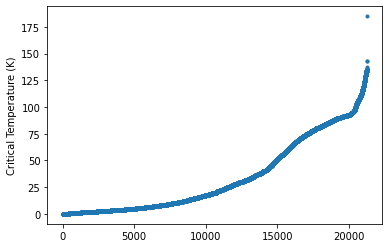

count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

In [22]:
plt.scatter(range(len(labels)), labels.sort_values(), marker=".")
plt.ylabel("Critical Temperature (K)")
plt.show()

labels.describe()

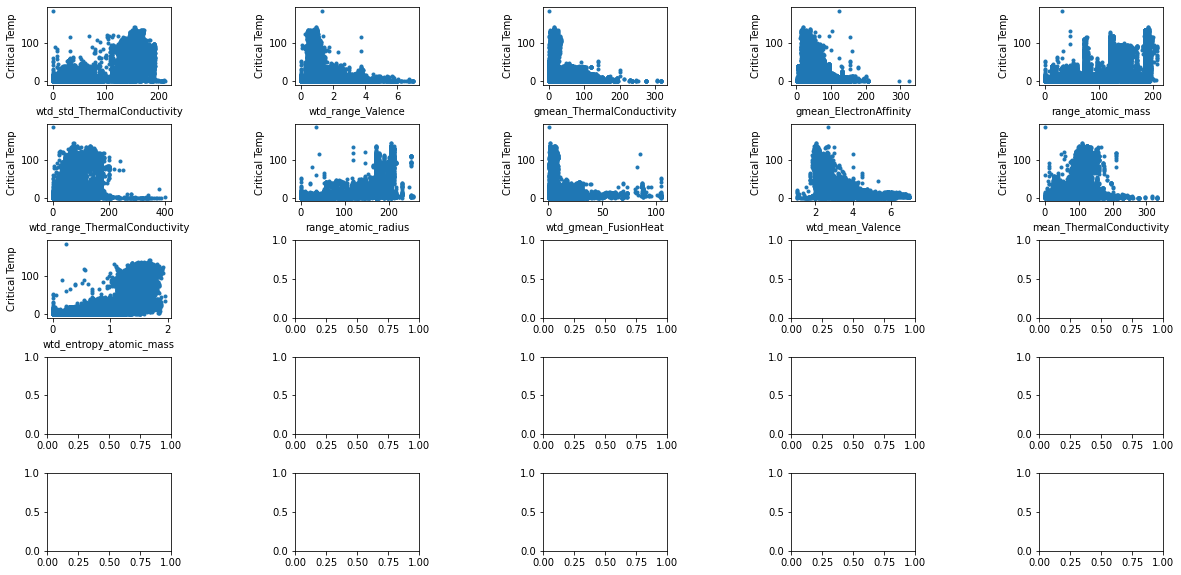

In [23]:
# Graph each feature against target
fig, axs = plt.subplots(numFeaturesToKeep//2, numFeaturesToKeep//2, figsize=(20, 10))
headings = featuresToKeep

for x in range(data.shape[1]):
    plt.subplot(numFeaturesToKeep//2, numFeaturesToKeep//2, x+1)
    plt.scatter(raw_data[featuresToKeep[x]].to_numpy(), labels, marker=".")
    plt.xlabel(featuresToKeep[x])
    plt.ylabel("Critical Temp")

plt.subplots_adjust(wspace=1, hspace=0.50)
plt.show()

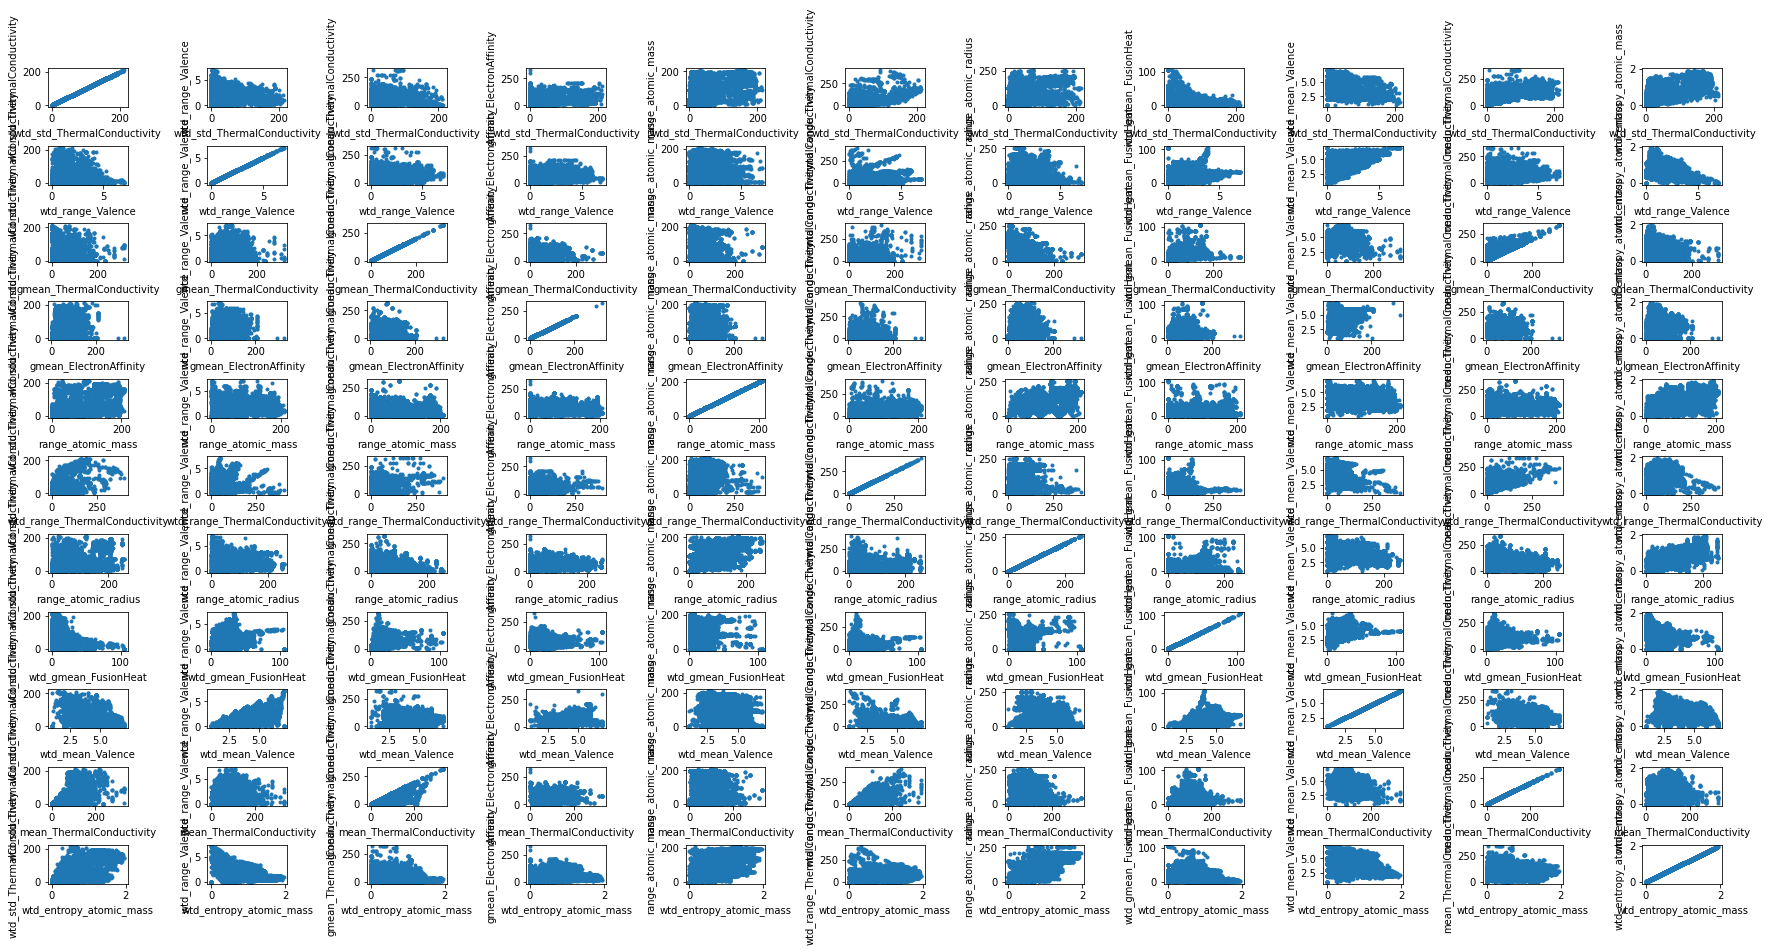

In [24]:
# Graph each feature against each other
fig, axs = plt.subplots(numFeaturesToKeep, numFeaturesToKeep, figsize=(30, 15))
headings = featuresToKeep

count = 1
for x in range(data.shape[1]):
    for y in range(data.shape[1]):
        plt.subplot(numFeaturesToKeep, numFeaturesToKeep, x*numFeaturesToKeep + y + 1)
        #plt.scatter(data[:,x], data[:,y], marker=",")
        plt.scatter(raw_data[featuresToKeep[x]].to_numpy(), raw_data[featuresToKeep[y]].to_numpy(), marker=".")
        plt.xlabel(featuresToKeep[x])
        plt.ylabel(featuresToKeep[y])

plt.subplots_adjust(wspace=1, hspace=1)
plt.show()

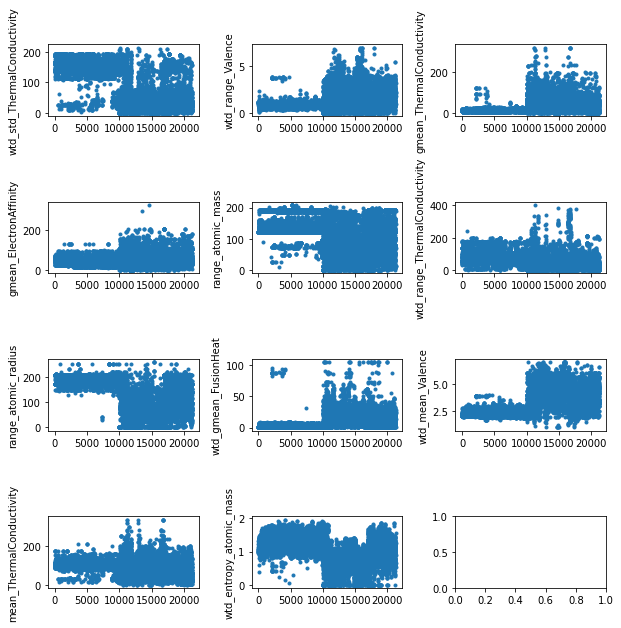

In [25]:
# Graph each feature's distribution. 
fig, axs = plt.subplots(4, 3, figsize=(10, 10))
headings = featuresToKeep

for x in range(data.shape[1]):
    plt.subplot(4, 3, x+1)
    plt.scatter(range(data.shape[0]), raw_data[featuresToKeep[x]].to_numpy(), marker=".")
    plt.ylabel(featuresToKeep[x])

plt.subplots_adjust(wspace=0.35, hspace=1.2)

plt.show()

(21263, 2)


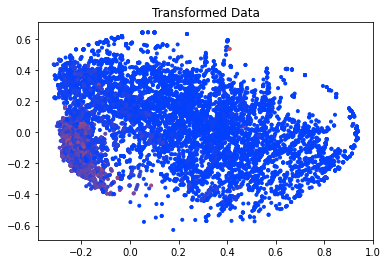

count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

In [26]:
# min = 0, max = 185
pca = decomposition.PCA(n_components=2)
newData = pca.fit_transform(preprocessing.normalize(data, norm="l2"))
print(newData.shape)

minValue = 0
maxValue = 185
start = (0, 64/255, 255/255)
end = (219/255, 78/255, 78/255)

def getColor(x):
    r = (end[0] - start[0]) * x/maxValue + start[0]
    g = (end[1] - start[1]) * x/maxValue + start[1]
    b = (end[2] - start[2]) * x/maxValue + start[2]

    return (r, g, b)
    
colors = [getColor(x) for x in labels]

plt.scatter(newData[:,0], newData[:,1], marker=".", c=colors)
plt.title("Transformed Data")
plt.show()

labels.describe()

In [28]:
# Split into training/test data set
train_data, test_data, train_labels, test_labels = train_test_split(data, labels.to_numpy(), test_size=0.3, random_state=50)

print(data.shape, labels.to_numpy().shape)
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

def displayModelResults(model, linear=False):
    predicted = model.predict(test_data)
    mse = np.mean((test_labels-predicted)**2)
    ssr = np.sum((predicted-np.mean(test_labels))**2)
    sst = np.sum((test_labels-np.mean(test_labels))**2)
    r2 = ssr/sst

    plt.scatter(test_labels, predicted, marker=".")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()

    plt.scatter(predicted, test_labels-predicted, marker=".")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()
    
    output = ""
    if linear:
        output += "Coefficients: " + str(model.coef_)
    output += "\nMSE: " + str(mse)
    output += "\nR2: " + str(r2)
    output += "\nTraining Score: " + str(model.score(train_data, train_labels))
    output += "\nTesting Score: " + str(model.score(test_data, test_labels))
    print(output)

(21263, 11) (21263,)
(14884, 11) (14884,) (6379, 11) (6379,)


# Linear Regression Models
Proved to not be very accurate, max score of 0.596. Not normalizing the data actually increased score by a bit, up from ~0.46.

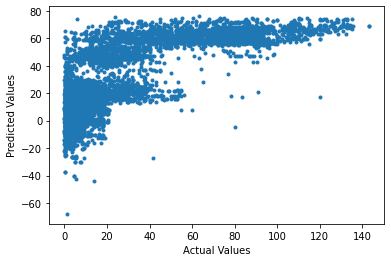

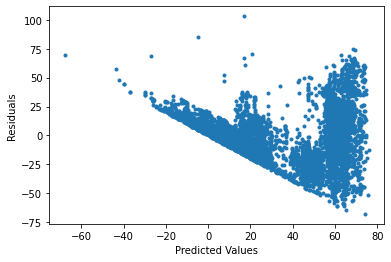

Coefficients: [ 0.2073428  -0.64398674 -0.08052662 -0.2015455   0.04302883  0.05140991
  0.04625706  0.11686447 -0.41403136  0.04016118 10.82210455]
MSE: 486.0577443048571
R2: 0.5795175230018365
Training Score: 0.5957140422434861
Testing Score: 0.5868957536911401


In [29]:
# Linear Regression
linear = skl.linear_model.LinearRegression()
linear.fit(train_data, train_labels)

displayModelResults(linear, linear=True)


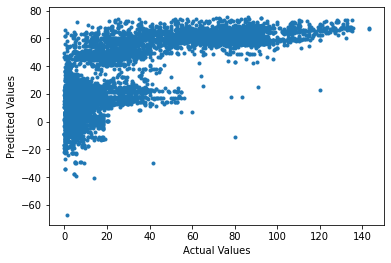

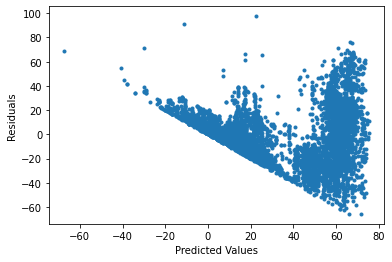

Coefficients: [ 0.25741504 -0.20795649 -0.03738314 -0.21548489  0.05678007  0.03056155
  0.0785844   0.05612997 -0.          0.00042416  0.        ]
MSE: 491.9400163255712
R2: 0.5727328722993675
Training Score: 0.590427087448258
Testing Score: 0.5818963650831548


In [30]:
# Lasso 
lasso = skl.linear_model.Lasso(alpha=.6)
lasso.fit(train_data, train_labels)

displayModelResults(lasso, linear=True)

# Nonlinear Regression

## KNN Regression
With 11 predictors (n=3): 
- Train Score:  0.9396288724685422
- Test Score:  0.8834860489942358

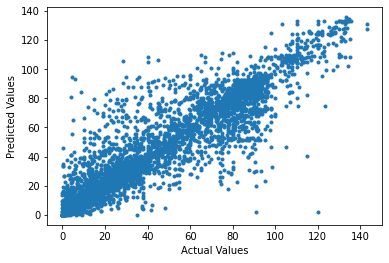

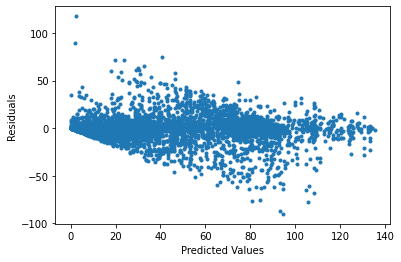


MSE: 136.78185661544796
R2: 0.957979184500116
Training Score: 0.9565979540252295
Testing Score: 0.8837480393061881


In [31]:
# KNN Regression
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(train_data, train_labels)

displayModelResults(knn)

## Regression Tree
With 11 predictors, max_depth=15:
- Train Score:  0.9527799144568172
- Test Score:  0.8760817928651625

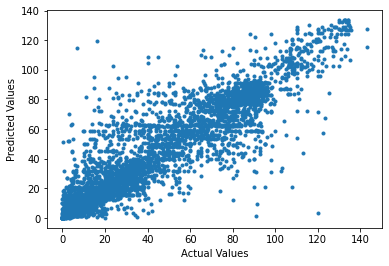

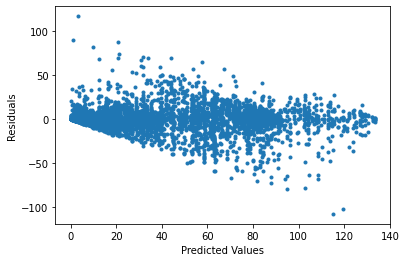


MSE: 149.91123703970027
R2: 0.9238001307294132
Training Score: 0.9315596302155243
Testing Score: 0.8725892770640187


In [32]:
# Regression Tree
tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=5)
tree.fit(train_data, train_labels)

displayModelResults(tree)

# MLP Network
With 11 predictors, `MLPRegressor(hidden_layer_sizes=(100,), max_iter=200, alpha=0.001, random_state=10)`
- Train Score:  0.7913469065298173
- Test Score:  0.7906321360651372

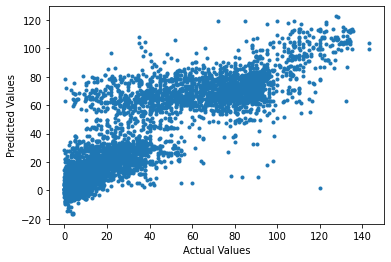

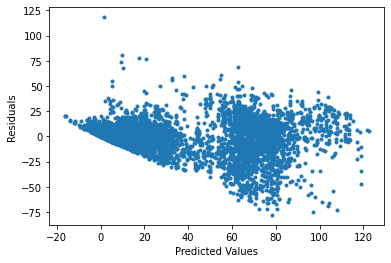


MSE: 250.43889304470468
R2: 0.8587083788427294
Training Score: 0.7864494231807633
Testing Score: 0.7871500426238058


In [33]:
# MLP Network
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=200, alpha=0.001, random_state=10)
mlp.fit(train_data, train_labels)

displayModelResults(mlp)

# Random Forest Regression
With n_estimators = 100:
- Training Score: 0.9769219303474632
- Testing Score: 0.9215080802721785

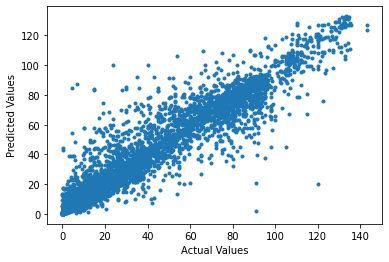

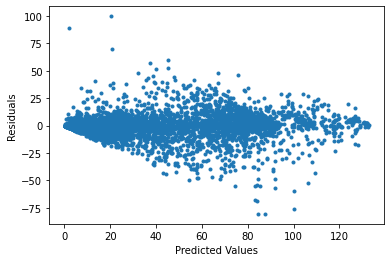


MSE: 92.74811290346804
R2: 0.9056593331136619
Training Score: 0.9752450405618616
Testing Score: 0.9211726595728816


In [35]:
forest = RandomForestRegressor(n_estimators=100, max_depth=20)
forest.fit(train_data, train_labels)

displayModelResults(forest)